<a href="https://colab.research.google.com/github/glbdhananjaya/Data-Prediction-Modal/blob/main/data_prediction_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import files

# **Uploading CSV file**

In [ ]:
uploaded=files.upload()

# **Reading the CSV and null check**

In [ ]:
dataset = pd.read_csv('AzureUsageData.csv')

print(dataset.isnull().sum())

# **Extracting actual data**

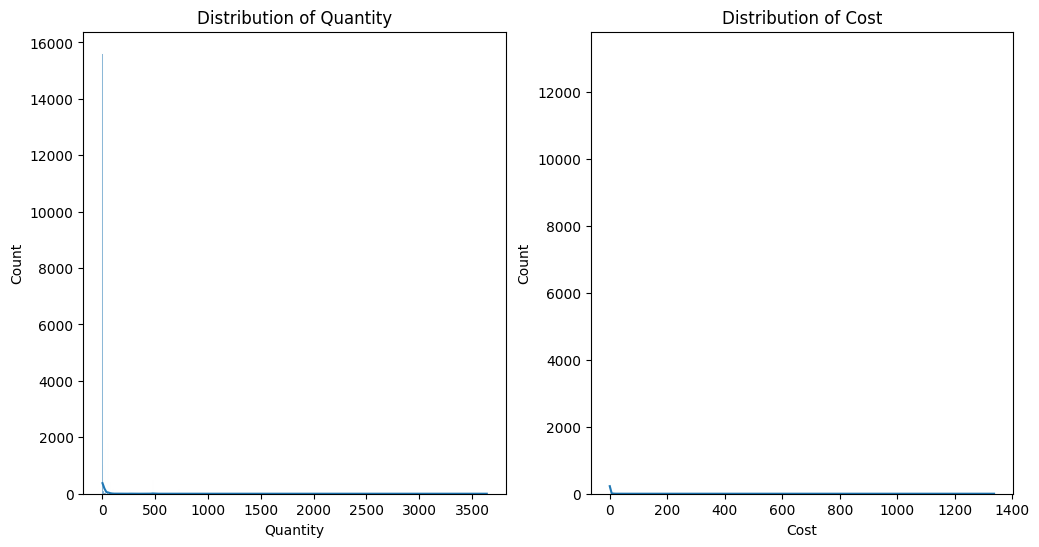

In [ ]:
# Data exploration and feature engineering
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Exploring the distribution of Quantity and Cost
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dataset['Quantity'], kde=True)
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
sns.histplot(dataset['Cost'], kde=True)
plt.title('Distribution of Cost')
plt.show()

total_cost_per_service = dataset.groupby('ServiceName')['Cost'].sum().reset_index()

# **Feature Scaling**

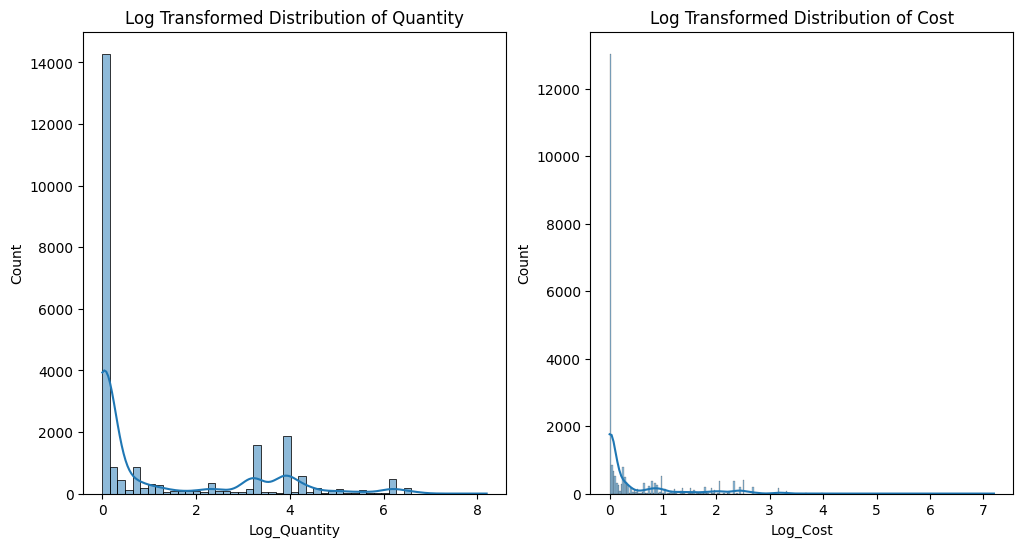

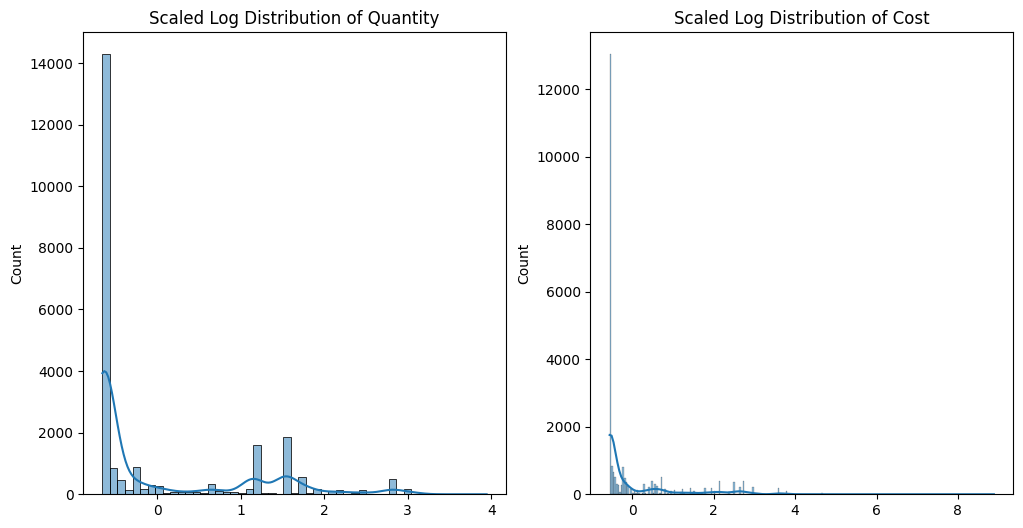

In [ ]:
dataset['Log_Quantity'] = np.log1p(dataset['Quantity'])
dataset['Log_Cost'] = np.log1p(dataset['Cost'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset['Log_Quantity'], kde=True)
plt.title('Log Transformed Distribution of Quantity')

plt.subplot(1, 2, 2)
sns.histplot(dataset['Log_Cost'], kde=True)
plt.title('Log Transformed Distribution of Cost')
plt.show()

scaler = StandardScaler()

# Log-transformed features
dataset_log_scaled = scaler.fit_transform(dataset[['Log_Quantity', 'Log_Cost']])

# Plot the scaled log-transformed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset_log_scaled[:,0], kde=True)
plt.title('Scaled Log Distribution of Quantity')

plt.subplot(1, 2, 2)
sns.histplot(dataset_log_scaled[:,1], kde=True)
plt.title('Scaled Log Distribution of Cost')

plt.show()

# **Clustering using elbow method**

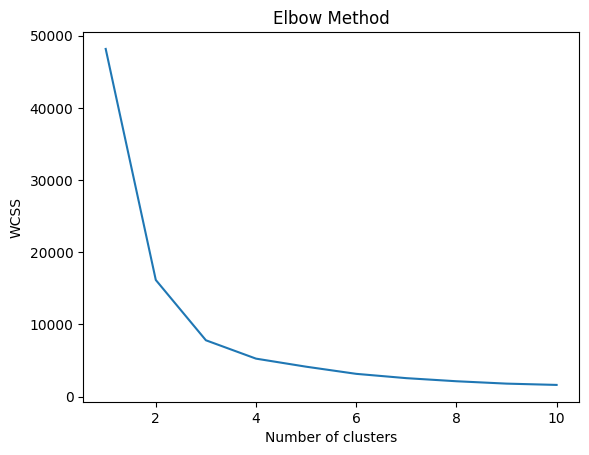

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dataset_log_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Getting optimal number of clusters**

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
dataset['Cluster'] = kmeans.fit_predict(dataset_log_scaled)

print(dataset.head())

# **Analysing the properties of each clusters**

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

for i in range(3): # assuming 3 clusters
    print(f"\nCluster {i+1}:")
    cluster_data = dataset[dataset['Cluster'] == i]
    print(cluster_data.describe())

[[ 1.36352184  0.04673954]
 [ 1.7671811   2.49675691]
 [-0.56827577 -0.38794607]]

Cluster 1:
          Quantity         Cost  Log_Quantity     Log_Cost  Cluster
count  3875.000000  3875.000000   3875.000000  3875.000000   3875.0
mean     53.325874     0.738315      3.599486     0.460710      0.0
std      58.038052     0.814001      0.859441     0.412345      0.0
min       3.364985     0.000000      1.473615     0.000000      0.0
25%      24.000000     0.096444      3.218876     0.092072      0.0
50%      24.480410     0.321600      3.237910     0.278843      0.0
75%      50.549900     1.200000      3.942550     0.788457      0.0
max     352.000000     3.717388      5.866468     1.551255      0.0

Cluster 2:
          Quantity         Cost  Log_Quantity     Log_Cost  Cluster
count  2655.000000  2655.000000   2655.000000  2655.000000   2655.0
mean    173.109086    11.274273      4.318694     2.328502      1.0
std     234.819367    27.837031      1.313661     0.481398      0.0
min       

# **Analysing final result**

In [ ]:
# Analyze the properties of each cluster
for i in range(3):
    print(f"\nCluster {i+1}:")
    cluster_data = dataset[dataset['Cluster'] == i]

    # Most common ServiceName in the cluster
    common_service_names = cluster_data['ServiceName'].value_counts().head(5)
    print("Most common Service Names:")
    print(common_service_names)

    # Most common ServiceType in the cluster
    common_service_types = cluster_data['ServiceType'].value_counts().head(5)
    print("\nMost common Service Types:")
    print(common_service_types)

    print("\nCluster Summary:")
    print(cluster_data.describe())


Cluster 1:
Most common Service Names:
Load Balancer        1046
Storage               944
Virtual Network       873
Virtual Machines      389
Azure App Service     245
Name: ServiceName, dtype: int64

Most common Service Types:
All                           1231
IP Addresses                   873
Standard SSD Managed Disks     566
Basic Plan - Linux             221
Standard HDD Managed Disks     208
Name: ServiceType, dtype: int64

Cluster Summary:
          Quantity         Cost  Log_Quantity     Log_Cost  Cluster
count  3875.000000  3875.000000   3875.000000  3875.000000   3875.0
mean     53.325874     0.738315      3.599486     0.460710      0.0
std      58.038052     0.814001      0.859441     0.412345      0.0
min       3.364985     0.000000      1.473615     0.000000      0.0
25%      24.000000     0.096444      3.218876     0.092072      0.0
50%      24.480410     0.321600      3.237910     0.278843      0.0
75%      50.549900     1.200000      3.942550     0.788457      0.0
ma

# **Generating graphs for each clusters**

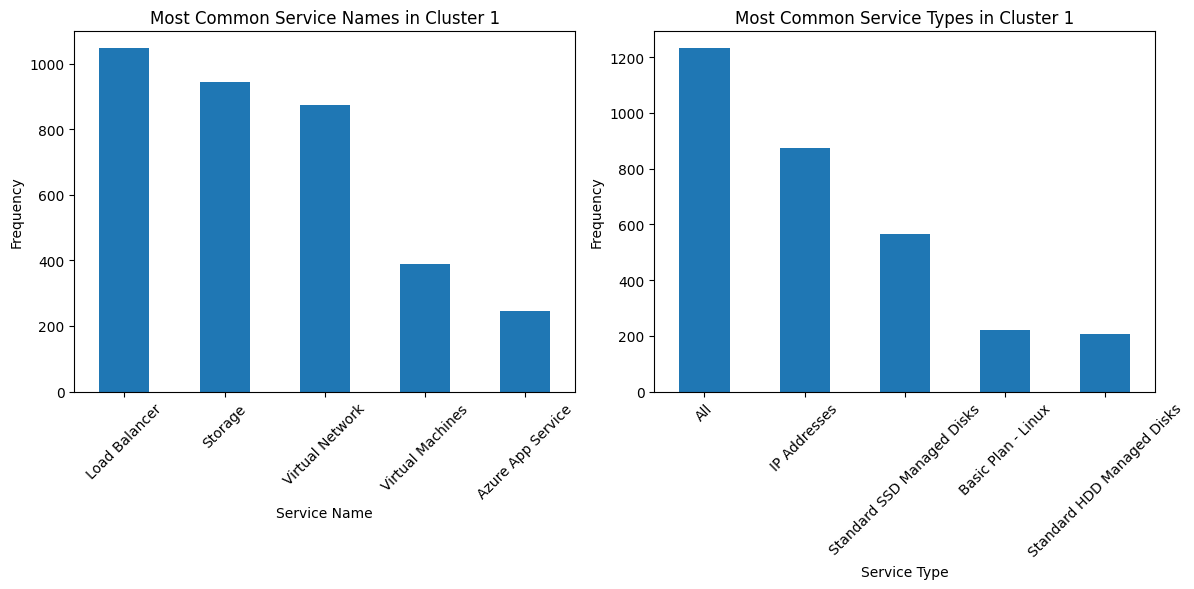

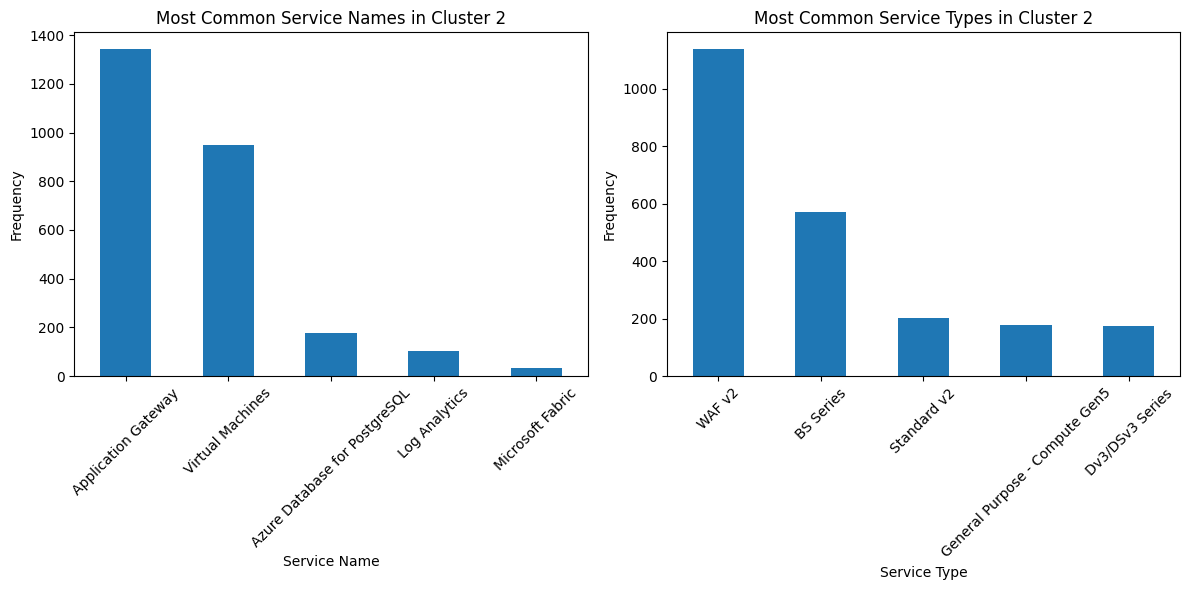

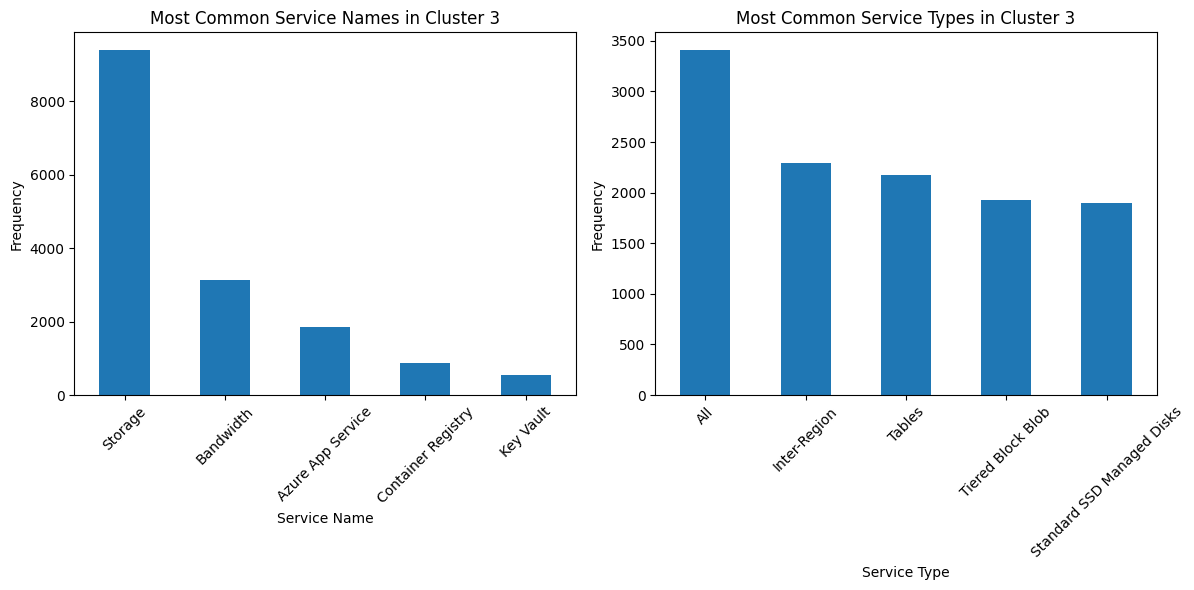

In [ ]:
for i in range(3):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)

    cluster_data = dataset[dataset['Cluster'] == i]

    common_service_names = cluster_data['ServiceName'].value_counts().head(5)
    common_service_names.plot(kind='bar')
    plt.title(f'Most Common Service Names in Cluster {i+1}')
    plt.xlabel('Service Name')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.subplot(1, 2, 2)

    common_service_types = cluster_data['ServiceType'].value_counts().head(5)
    common_service_types.plot(kind='bar')
    plt.title(f'Most Common Service Types in Cluster {i+1}')
    plt.xlabel('Service Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()